Рассмотрим датасет "Taxi Fare Data 2023", который можно скачать https://www.kaggle.com/datasets/hrish4/taxi-trip-fare-data-2023

Описание датасета:
Этот набор данных содержит подробную информацию о поездках на такси, включая количество пассажиров, расстояние поездки, тип оплаты, стоимость проезда и продолжительность поездки. Он полезен для различных задач по анализу данных и машинному обучению, таких как прогнозирование стоимости проезда и анализ маршрутов поездок.

1)passenger_count - количество пассажиров в поездке на такси.

2)trip_distance - Общее расстояние поездки (в милях).

3)payment_type - тип платежа.

4)fare_amount - Стоимость проезда, взимаемая за поездку.

5)duration - Общая продолжительность поездки (в минутах).

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('Taxi_Trip_Data_preprocessed.csv')
df.head()

,passenger_count,trip_distance,payment_type,fare_amount,duration
0,1,3.70,Card,24.0,27.950000
1,1,2.77,Card,18.4,19.200000
2,1,3.30,Card,22.6,27.383333
3,1,0.30,Cash,5.1,2.550000
4,1,0.83,Card,7.2,5.250000


In [71]:
df.isnull().sum()

passenger_count    0
trip_distance      0
payment_type       0
fare_amount        0
duration           0
dtype: int64

Первичный анализ признаков:
Признак passenger_count - количественный признак, т.к. всего присутствует в выборке 5 значений данного параметра.

In [44]:
df['passenger_count'].value_counts()

passenger_count
1    6587822
2    1259060
3     316883
4     170241
5     117084
Name: count, dtype: int64

In [45]:
min_distance = min(df['trip_distance'])
print(min_distance)
max_distance = max(df['trip_distance'])
print(max_distance)

0.01
5.23


Text(0, 0.5, 'count of trips')

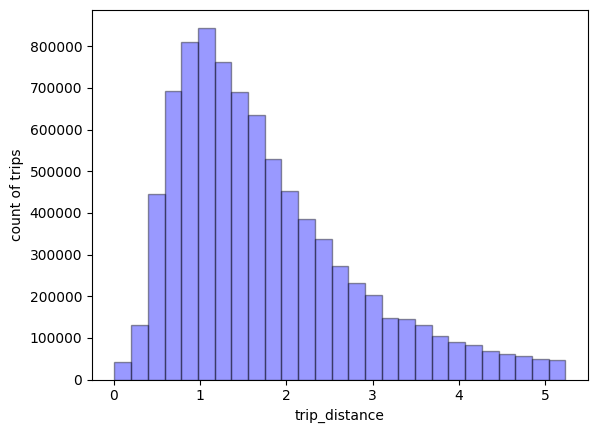

In [46]:
sns.distplot(df['trip_distance'], hist=True, kde=False, 
             bins=int(5.5/0.2), color = 'blue',
             hist_kws={'edgecolor':'black'})
plt.ylabel('count of trips')

In [47]:
df['payment_type'].value_counts().to_frame().style.background_gradient(cmap='summer')

,count
payment_type,
Card,7008088
Cash,1443002


Количественный признак - duration (продолжительность поездки в минутах)


In [48]:
min_duration = min(df['duration'])
print(min_duration)
max_duration = max(df['duration'])
print(max_duration)

0.0166666666666666
29.95


Text(0, 0.5, 'count of trips')

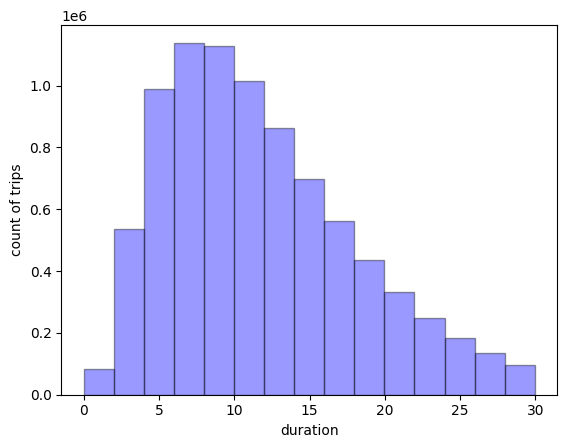

In [49]:
sns.distplot(df['duration'], hist=True, kde=False, 
             bins=int(30/2), color = 'blue',
             hist_kws={'edgecolor':'black'})
plt.ylabel('count of trips')

Можем наблюдать распределение количества поездок по длительности по времени в минутах

Нашей задачей предсказания будет определение ценовой категории поездки исходя из имеющихся данных - числа пассажиров, расстояния поездки,типа платежа, общей продолжительности поездки. 


Для начала рассмотрим признак "стоимость поездки". Для большей наглядности и упрощения прогнозирования этого признака стоит преобразовать данный количественный признак в категориальный (соответственно предоставить ценовые диапазоны вместо конкретного числа). Узнаем минимальное и максимальное значение цены поездки, разделим весь ценовой диапазон на отдельные интервалы.

In [50]:
min_price = min(df['fare_amount'])
print(min_price)

0.01


In [51]:
max_price = max(df['fare_amount'])
print(max_price)

40.8


In [72]:
df['fare_amount_category'] = 0  # заполняем сначала значения нового признака нулями
df.loc[df['fare_amount'] <= 13.6, 'fare_amount_category'] = 1  # далле разбиваем возраста на 3 категории
df.loc[(df['fare_amount'] > 13.6) & (df['fare_amount'] <= 27.2), 'fare_amount_category'] = 2
df.loc[(df['fare_amount'] > 27.2) & (df['fare_amount'] <= 40.8), 'fare_amount_category'] = 3

df.head()

,passenger_count,trip_distance,payment_type,fare_amount,duration,fare_amount_category
0,1,3.70,Card,24.0,27.950000,2
1,1,2.77,Card,18.4,19.200000,2
2,1,3.30,Card,22.6,27.383333,2
3,1,0.30,Cash,5.1,2.550000,1
4,1,0.83,Card,7.2,5.250000,1


In [73]:
df['fare_amount_category'].value_counts().to_frame().style.background_gradient(cmap='summer')

,count
fare_amount_category,
1,5369601
2,3022535
3,58954


Text(0, 0.5, 'count of trips')

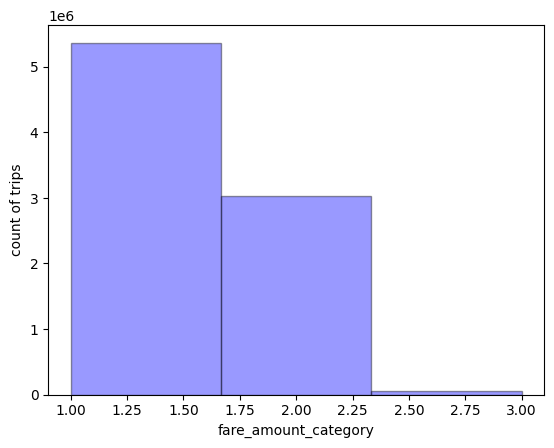

In [54]:
sns.distplot(df['fare_amount_category'], hist=True, kde=False, 
             bins=int(3/1), color = 'blue',
             hist_kws={'edgecolor':'black'})
plt.ylabel('count of trips')

Продолжим анализ признаков:

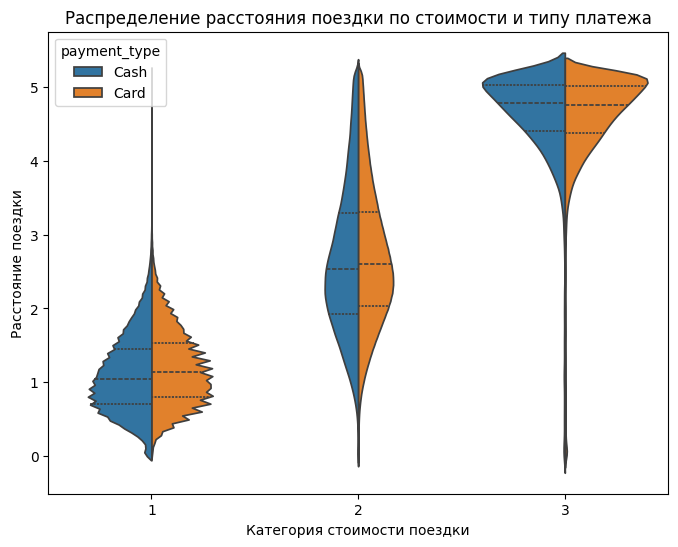

In [55]:
plt.figure(figsize=(8, 6))  # Размер графика
sns.violinplot(x='fare_amount_category', y='trip_distance', hue='payment_type',
               data=df, split=True, inner="quartile") # split=True для сравнения половинок
plt.title('Распределение расстояния поездки по стоимости и типу платежа')
plt.xlabel('Категория стоимости поездки')
plt.ylabel('Расстояние поездки')
plt.show()

Отсюда можно сделать вполне ожидаемый вывод, что стоимость поездки растёт с увеличением расстояния поездки.

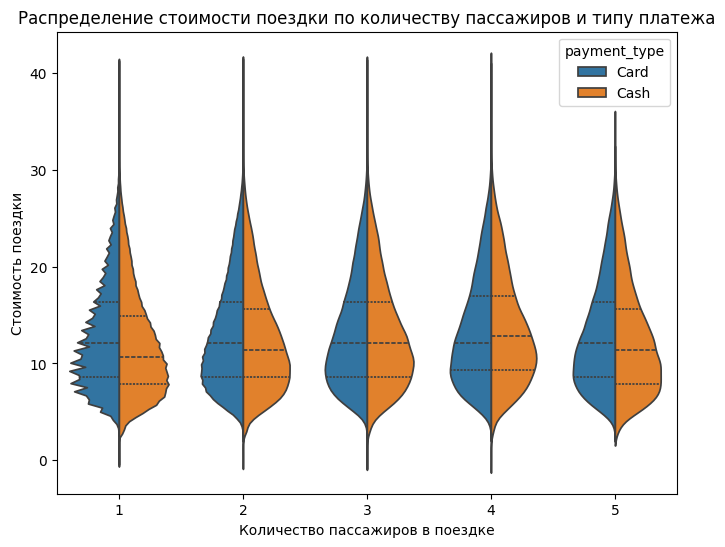

In [56]:
plt.figure(figsize=(8, 6))  # Размер графика
sns.violinplot(x='passenger_count', y='fare_amount', hue='payment_type',
               data=df, split=True, inner="quartile") # split=True для сравнения половинок
plt.title('Распределение стоимости поездки по количеству пассажиров и типу платежа')
plt.xlabel('Количество пассажиров в поездке')
plt.ylabel('Стоимость поездки')
plt.show()

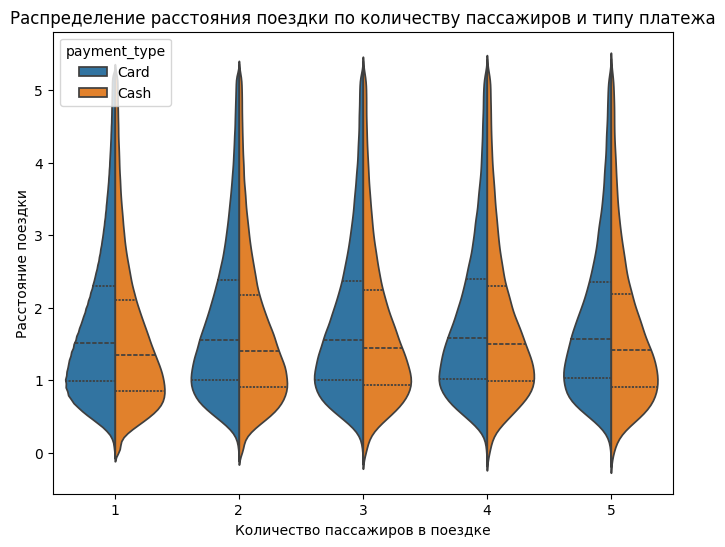

In [57]:
plt.figure(figsize=(8, 6))  # Размер графика
sns.violinplot(x='passenger_count', y='trip_distance', hue='payment_type',
               data=df, split=True, inner="quartile") # split=True для сравнения половинок
plt.title('Распределение расстояния поездки по количеству пассажиров и типу платежа')
plt.xlabel('Количество пассажиров в поездке')
plt.ylabel('Расстояние поездки')
plt.show()

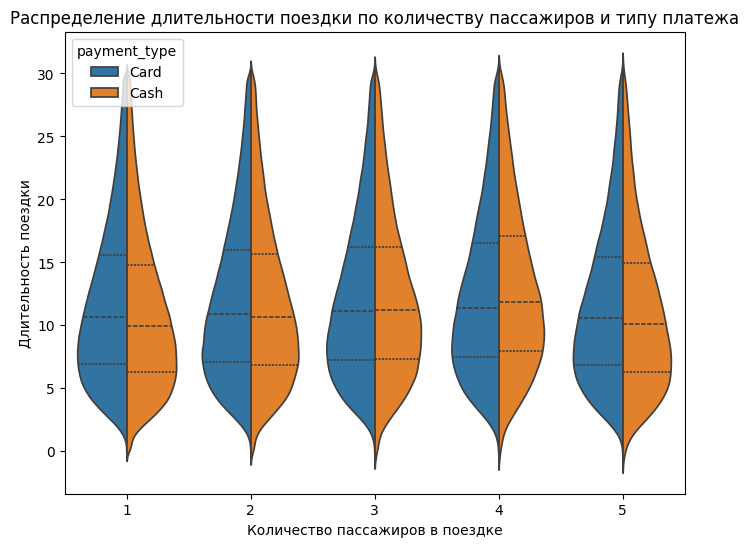

In [58]:
plt.figure(figsize=(8, 6))  # Размер графика
sns.violinplot(x='passenger_count', y='duration', hue='payment_type',
               data=df, split=True, inner="quartile") # split=True для сравнения половинок
plt.title('Распределение длительности поездки по количеству пассажиров и типу платежа')
plt.xlabel('Количество пассажиров в поездке')
plt.ylabel('Длительность поездки')
plt.show()

Из последних 4 визуализаций связи между разными параметрами выборки можно понять, что параметры passenger_count и payment_type не представляют особого интереса в анализе датасета: нет особоых изменений остальных признаков в делении по количеству пассажиров и по типe платежа. Стоимость, как и расстояние не зависит от количества пассажиров и от типа платежа(что вполне очевидно). 

Далее будем оценивать связь между длительностью поездки, расстоянием и стоимостью


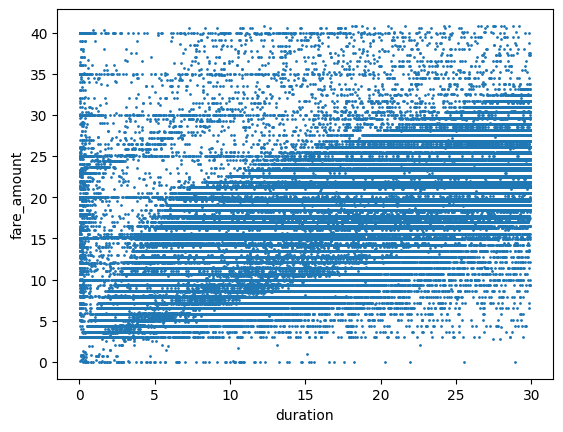

In [59]:
df.plot.scatter(x = 'duration', y = 'fare_amount', s = 1); 

<Axes: xlabel='duration', ylabel='fare_amount'>

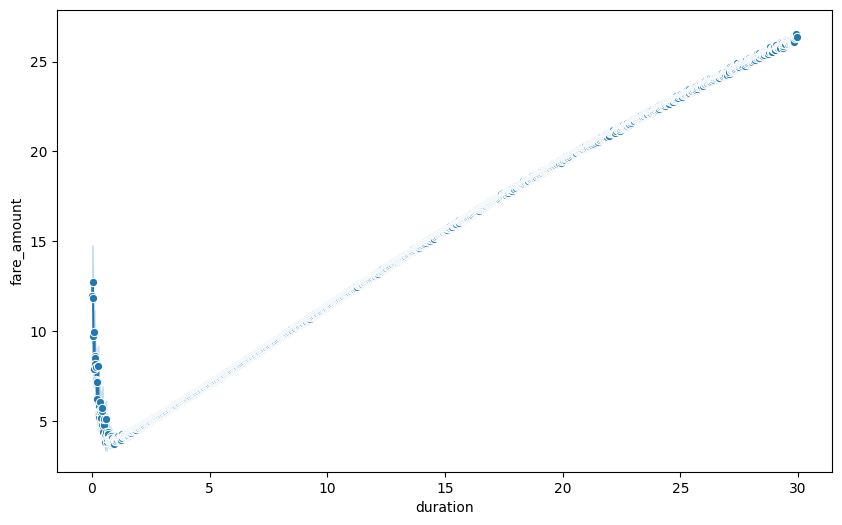

In [60]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='duration', y='fare_amount', data=df, marker='o') 

По 1 графику видно, что абсолютно точной зависимости между стоимостью и длительностью поездки нет, но по обоим графикам видно определенное уплотнение данных, представляюoее из себя некоторую почти линейную зависимость. Т.е. всё-таки имея данные о длительности поездки можно предполагать с некоторой вероятностью какую стоимость будет оплачивать пассажир.

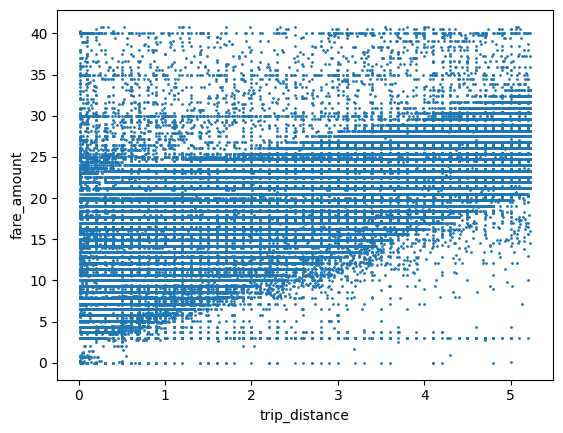

In [61]:
df.plot.scatter(x = 'trip_distance', y = 'fare_amount', s = 1); 

<Axes: xlabel='trip_distance', ylabel='fare_amount'>

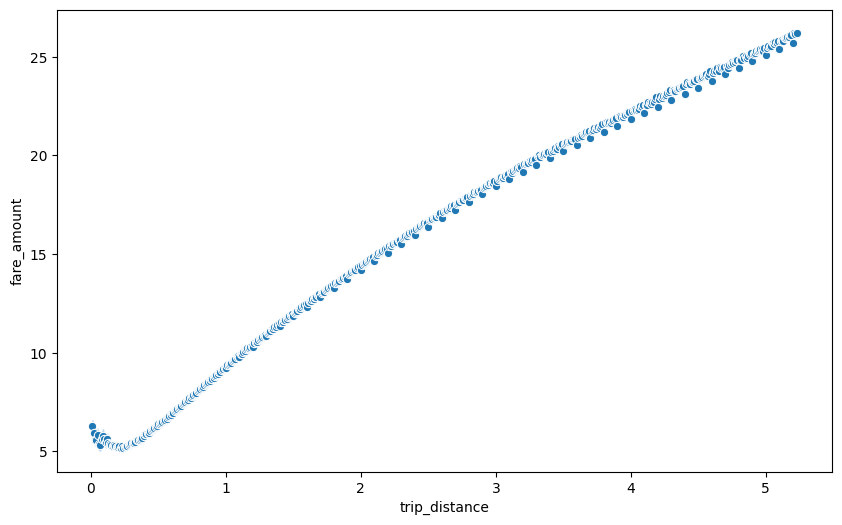

In [62]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='trip_distance', y='fare_amount', data=df, marker='o') 

Аналогичную ситуацию видим и в случае зависимости цены от расстояния. 

Посмотрим дополнительно на связь между расстоянием и длительностью поездки.

<Axes: xlabel='trip_distance', ylabel='duration'>

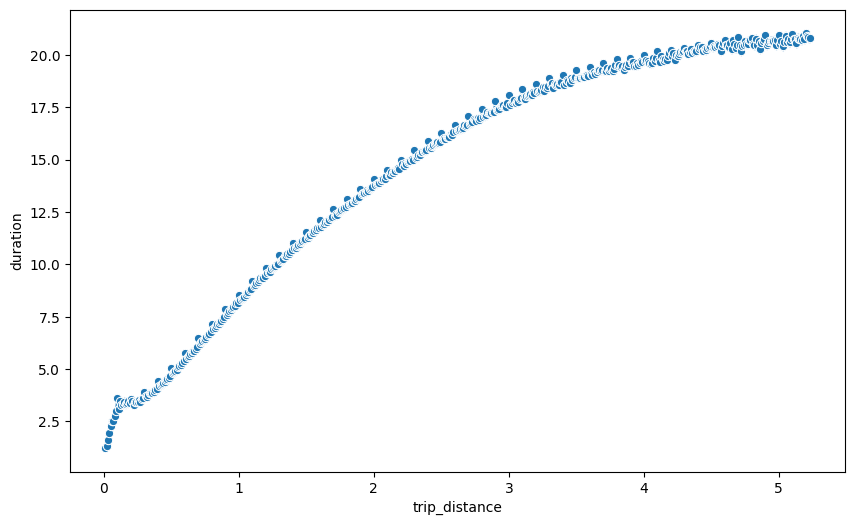

In [66]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='trip_distance', y='duration', data=df, marker='o')  

Дополнительно построим таблицу корреляции признаков. Сначала для этого преобразуем категориальный признак payment_type в численный.

In [74]:
df['payment_type_numeric'] = df['payment_type'].map({'Card': 1, 'Cash': 0})

print(df.head())

   passenger_count  trip_distance payment_type  fare_amount   duration  \
0                1           3.70         Card         24.0  27.950000   
1                1           2.77         Card         18.4  19.200000   
2                1           3.30         Card         22.6  27.383333   
3                1           0.30         Cash          5.1   2.550000   
4                1           0.83         Card          7.2   5.250000   

   fare_amount_category  payment_type_numeric  
0                     2                     1  
1                     2                     1  
2                     2                     1  
3                     1                     0  
4                     1                     1  


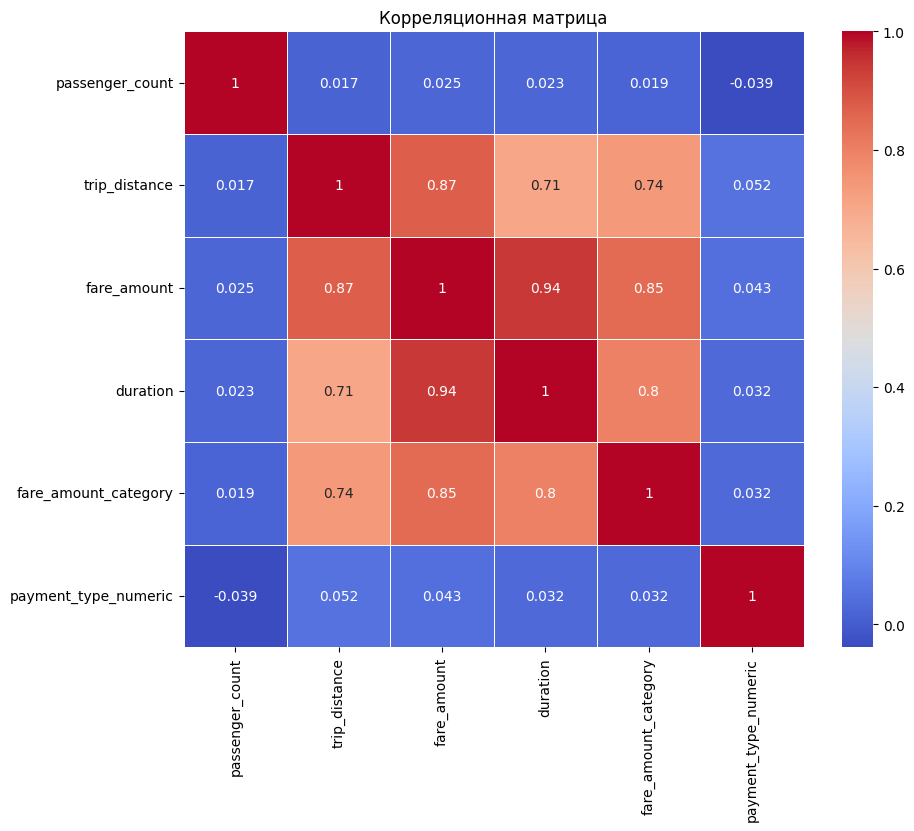

In [75]:
correlation_matrix = df.corr(numeric_only=True) 
plt.figure(figsize=(10, 8))  # Размер графика для лучшей читаемости
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Корреляционная матрица")
plt.show()

Проведя анализ признаков можно сделать следующие выводы:

In [76]:
df.drop(['passenger_count', 'payment_type_numeric', 'payment_type'], axis=1, inplace=True)


In [77]:
print(df.head())

   trip_distance  fare_amount   duration  fare_amount_category
0           3.70         24.0  27.950000                     2
1           2.77         18.4  19.200000                     2
2           3.30         22.6  27.383333                     2
3           0.30          5.1   2.550000                     1
4           0.83          7.2   5.250000                     1
